# Run EHR-ML for Mortality

## Create data

### Read data matrix containing data

In [1]:
import pandas as pd


casestudy1DirPath = '/home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1'

dataDf = pd.read_csv(casestudy1DirPath + '''/data_matrix_final.csv''')
dataDf

,measurement_date,vitals_ALP_avg,vitals_ALT_avg,vitals_Albumin_avg,vitals_Basophils_avg,vitals_Bicarbonate_avg,vitals_Bilirubin_avg,vitals_Calcium_avg,vitals_Chloride_avg,vitals_Creatinine_avg,...,vitals_SystolicBloodPressureCuff_avg,vitals_DiastolicBloodPressureCuff_avg,vitals_MeanArterialPressureCuff_avg,person_id,los_gt_7_days,los_gt_14_days,los_gt_30_days,los_gt_60_days,los_gt_90_days,admittime
0,2021-05-31,200.000000,25.000000,26.000000,0.04,26.0,11.000000,2.191763,103.388509,85.0,...,121.0,55.0,82.000000,41308,0,0,0,0,0,2021-05-31
1,2020-11-24,58.000000,13.000000,35.000000,0.02,28.0,5.000000,2.220000,102.000000,91.0,...,150.0,87.0,104.000000,56749,1,1,1,0,0,2021-07-30
2,2021-07-29,125.000000,354.000000,30.000000,0.02,29.0,10.000000,2.390000,103.388509,103.0,...,191.0,85.0,122.000000,56749,1,1,1,0,0,2021-07-30
3,2021-07-30,107.000000,264.000000,26.000000,0.03,26.0,8.000000,2.200000,103.000000,101.0,...,132.0,57.0,113.000000,56749,1,1,1,0,0,2021-07-30
4,2021-07-31,127.025688,35.740125,27.285302,0.01,27.0,16.974972,2.220000,106.000000,103.0,...,123.0,56.0,114.000000,56749,1,1,1,0,0,2021-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725,2021-08-17,127.025688,35.740125,27.285302,0.01,33.0,16.974972,2.180000,98.000000,68.0,...,147.0,89.0,84.952515,2526936,1,1,1,0,0,2021-08-15
9726,2021-08-18,188.000000,8.000000,19.000000,0.04,30.0,13.000000,2.150000,101.000000,58.0,...,165.0,85.0,106.000000,2526936,1,1,1,0,0,2021-08-15
9727,2021-08-19,176.000000,8.000000,20.000000,0.02,27.0,15.000000,2.290000,100.000000,53.0,...,177.0,91.0,107.000000,2526936,1,1,1,0,0,2021-08-15
9728,2021-08-21,127.025688,35.740125,27.285302,0.03,29.0,16.974972,2.191763,99.000000,61.0,...,161.0,94.0,113.000000,2526936,1,1,1,0,0,2021-08-15


### Read data matrix containing mortality labels

In [2]:
import pandas as pd


casestudy1DirPath = '/home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1'

mortalityDf = pd.read_csv(casestudy1DirPath + '''/data_matrix_mortality.csv''')
mortalityDf

,person_id,visit_occurrence_id,measurement_date,admittime_adm,dischtime_adm,vitals_Peripheral oxygen saturation_avg,vitals_Respiratory rate_avg,vitals_Temperature_avg,vitals_Systolic blood pressure_avg,vitals_Diastolic blood pressure_avg,...,labs_Total alkaline phosphatase level_last,labs_Total protein measurement_last,labs_Globulin_last,labs_Calcium_last,labs_Phosphate measurement_last,labs_Magnesium measurement_last,death_7_day,death_14_day,death_30_day,JOURNEY_ID
0,2133327,567916,2018-09-05,2018-11-26,05/09/2018,100.000000,16.000000,36.200000,116.000000,62.000000,...,223.33,65.56,39.00,2.3500,1.2100,0.9800,0,0,0,567916
1,2197822,572108,2018-07-25,2019-04-16,25/07/2018,96.000000,18.398811,36.600000,120.000000,63.000000,...,536.00,55.00,36.00,2.0000,0.4000,0.8000,0,0,0,572108
2,2138701,584423,2018-10-29,2018-11-12,02/10/2018,97.683062,12.000000,36.736949,110.000000,60.004900,...,225.64,68.63,38.93,2.2691,1.1253,0.7749,0,0,0,565491
3,330958,584875,2018-10-22,2019-03-02,13/03/2019,97.666667,18.000000,36.133333,111.000000,65.666667,...,133.81,78.96,42.00,2.5800,1.5000,0.8200,0,0,0,584875
4,330958,584875,2018-10-29,2019-03-02,13/03/2019,96.666667,17.333333,36.500000,119.000000,72.333333,...,142.64,77.10,42.00,2.4900,1.3700,0.7300,0,0,0,584875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30835,2240165,17882738,2023-07-13,2023-07-12,29/07/2023,99.625000,17.571429,36.612500,135.000000,72.125000,...,113.00,52.00,26.00,1.9800,1.1400,0.7700,0,0,1,17882738
30836,2514680,17883870,2023-07-03,2023-07-03,04/07/2023,99.200000,17.200000,36.150000,110.454545,47.363636,...,122.00,49.00,30.00,2.1027,0.9838,0.8681,0,0,0,17883870
30837,2514680,17883870,2023-07-04,2023-07-03,04/07/2023,96.166667,16.416667,36.241667,92.666667,42.111111,...,93.00,52.00,22.00,2.1400,1.4500,0.8700,0,0,0,17883870
30838,2449953,17907968,2023-07-11,2023-07-11,11/07/2023,97.800000,17.200000,36.755556,107.916667,59.166667,...,167.00,57.00,26.00,2.2067,1.0356,0.7696,0,0,0,17907968


### Merge data with mortality labels

In [15]:
mergedDf = dataDf.merge(
    mortalityDf[['person_id', 'admittime_adm', 'death_7_day', 'death_14_day', 'death_30_day']].drop_duplicates(),
    how='inner',
    left_on=['person_id', 'admittime'],
    right_on=['person_id', 'admittime_adm'],
).drop(columns=['admittime_adm', 'los_gt_7_days', 'los_gt_14_days', 'los_gt_30_days', 'los_gt_60_days', 'los_gt_90_days']).drop_duplicates()
mergedDf

,measurement_date,vitals_ALP_avg,vitals_ALT_avg,vitals_Albumin_avg,vitals_Basophils_avg,vitals_Bicarbonate_avg,vitals_Bilirubin_avg,vitals_Calcium_avg,vitals_Chloride_avg,vitals_Creatinine_avg,...,vitals_Urea_avg,vitals_WBC_avg,vitals_SystolicBloodPressureCuff_avg,vitals_DiastolicBloodPressureCuff_avg,vitals_MeanArterialPressureCuff_avg,person_id,admittime,death_7_day,death_14_day,death_30_day
0,2021-05-31,200.000000,25.000000,26.000000,0.04,26.0,11.000000,2.191763,103.388509,85.0,...,9.7,15.98,121.0,55.0,82.000000,41308,2021-05-31,0,0,0
1,2020-11-24,58.000000,13.000000,35.000000,0.02,28.0,5.000000,2.220000,102.000000,91.0,...,12.2,6.44,150.0,87.0,104.000000,56749,2021-07-30,0,0,0
2,2020-11-24,58.000000,13.000000,35.000000,0.02,28.0,5.000000,2.220000,102.000000,91.0,...,12.2,6.44,150.0,87.0,104.000000,56749,2021-07-30,1,1,1
3,2021-07-29,125.000000,354.000000,30.000000,0.02,29.0,10.000000,2.390000,103.388509,103.0,...,25.5,5.18,191.0,85.0,122.000000,56749,2021-07-30,0,0,0
4,2021-07-29,125.000000,354.000000,30.000000,0.02,29.0,10.000000,2.390000,103.388509,103.0,...,25.5,5.18,191.0,85.0,122.000000,56749,2021-07-30,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7748,2021-08-17,127.025688,35.740125,27.285302,0.01,33.0,16.974972,2.180000,98.000000,68.0,...,2.8,9.04,147.0,89.0,84.952515,2526936,2021-08-15,0,0,0
7749,2021-08-18,188.000000,8.000000,19.000000,0.04,30.0,13.000000,2.150000,101.000000,58.0,...,2.6,9.34,165.0,85.0,106.000000,2526936,2021-08-15,0,0,0
7750,2021-08-19,176.000000,8.000000,20.000000,0.02,27.0,15.000000,2.290000,100.000000,53.0,...,2.4,9.48,177.0,91.0,107.000000,2526936,2021-08-15,0,0,0
7751,2021-08-21,127.025688,35.740125,27.285302,0.03,29.0,16.974972,2.191763,99.000000,61.0,...,2.5,6.84,161.0,94.0,113.000000,2526936,2021-08-15,0,0,0


### Save merged data

In [16]:
casestudy1DirPath = '/home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1'
mergedDf.to_csv(casestudy1DirPath + '''/data_matrix_mortality_final.csv''', index=False)

## Modelling

### Run the analysis with: `WB=30 WA=30`

In [ ]:
import os


casestudy1DirPath = '/home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1'

for mortalityDays in [7, 14, 30]:

    print('--------------------------------------------------------------------------------------------------------------------')
    print('losDays: ', mortalityDays)
    print('--------------------------------------------------------------------------------------------------------------------')

    os.system(
        'cd ' + os.environ['EHR_ML_BASE'] + ';'
        +
        '''.venv/bin/python -m ehrml.analysis.StandardisationAnalysis ''' + casestudy1DirPath + '''/data_matrix_mortality_final.csv -tc "death_''' + str(mortalityDays) + '''_day" -ic "person_id" -mdc "measurement_date" -adc "admittime" -wb 30 -wa 30 -sp ''' + casestudy1DirPath + '''/results/02.1/death_''' + str(mortalityDays) + '''_day;'''
        )


--------------------------------------------------------------------------------------------------------------------
losDays:  7
--------------------------------------------------------------------------------------------------------------------
2025-01-13 00:26:23,154 - EHR-ML - INFO - Parsing command line arguments
2025-01-13 00:26:23,155 - EHR-ML - INFO - args.data_file: /home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1/data_matrix_mortality_final.csv
2025-01-13 00:26:23,155 - EHR-ML - INFO - args.target_column: death_7_day
2025-01-13 00:26:23,155 - EHR-ML - INFO - args.id_columns: ['person_id']
2025-01-13 00:26:23,155 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2025-01-13 00:26:23,155 - EHR-ML - INFO - args.anchor_date_column: admittime
2025-01-13 00:26:23,155 - EHR-ML - INFO - args.window_before: 30
2025-01-13 00:26:23,155 - EHR-ML - INFO - args.window_after: 30
2025-01-13 00:26:23,155 - EHR-ML - INFO - args.ensemble: False
2025-01-13 00:26:23,155 - E

## Results

### Obtain the results

In [24]:
import json

import pandas as pd

from pathlib import Path

from statistics import mean
from statistics import stdev


casestudy1DirPath = '/home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1'

result_files = [
    'wb_30_wa_30_original.json',
    # 'wb_30_wa_30_standardised.json',
    # 'wb_30_wa_30_scaled.json',
]

data = []

for mortalityDays in [7, 14, 30]:

    resultsDirPath = casestudy1DirPath + '''/results/02.1/death_''' + str(mortalityDays) + '''_day'''

    for result_file in result_files:
        with open(Path(resultsDirPath, result_file)) as f:
            result = json.load(f)
            print()
            # print('Accuracy: ', round(mean(result['test_accuracy']), 2), '+-', round(stdev(result['test_accuracy']), 3))
            # print('Balanced Accuracy: ', round(mean(result['test_balanced_accuracy']), 2), '+-', round(stdev(result['test_balanced_accuracy']), 3))
            # print('Average Precision: ', round(mean(result['test_average_precision']), 2), '+-', round(stdev(result['test_average_precision']), 3))
            # print('F1: ', round(mean(result['test_f1']), 2), '+-', round(stdev(result['test_f1']), 3))
            # print('ROCAUC: ', round(mean(result['test_roc_auc']), 2), '+-', round(stdev(result['test_roc_auc']), 3))
            # data.append([losDays,
            #     result_file.split('/')[-1].split('.')[0].split('_')[4],
            #     round(mean(result['test_accuracy']), 2), round(stdev(result['test_accuracy']), 3),
            #     round(mean(result['test_balanced_accuracy']), 2), round(stdev(result['test_balanced_accuracy']), 3),
            #     round(mean(result['test_average_precision']), 2), round(stdev(result['test_average_precision']), 3),
            #     round(mean(result['test_f1']), 2), round(stdev(result['test_f1']), 3),
            #     round(mean(result['test_roc_auc']), 2), round(stdev(result['test_roc_auc']), 3),
            #     ])
            data.append(['Accuracy', mortalityDays, round(mean(result['test_accuracy']), 2)])
            data.append(['Balanced Accuracy', mortalityDays, round(mean(result['test_balanced_accuracy']), 2)])
            data.append(['Average Precision', mortalityDays, round(mean(result['test_average_precision']), 2)])
            data.append(['F1', mortalityDays, round(mean(result['test_f1']), 2)])
            data.append(['ROCAUC', mortalityDays, round(mean(result['test_roc_auc']), 2)])

plotDf = pd.DataFrame(data, columns=['Metric', 'Mortality', 'Score'])
plotDf

,Metric,Mortality,Score
0,Accuracy,7,0.88
1,Balanced Accuracy,7,0.53
2,Average Precision,7,0.23
3,F1,7,0.13
4,ROCAUC,7,0.58
5,Accuracy,14,0.88
6,Balanced Accuracy,14,0.53
7,Average Precision,14,0.23
8,F1,14,0.13
9,ROCAUC,14,0.58


### Plot

/tmp/ipykernel_1709820/555945711.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.lineplot(


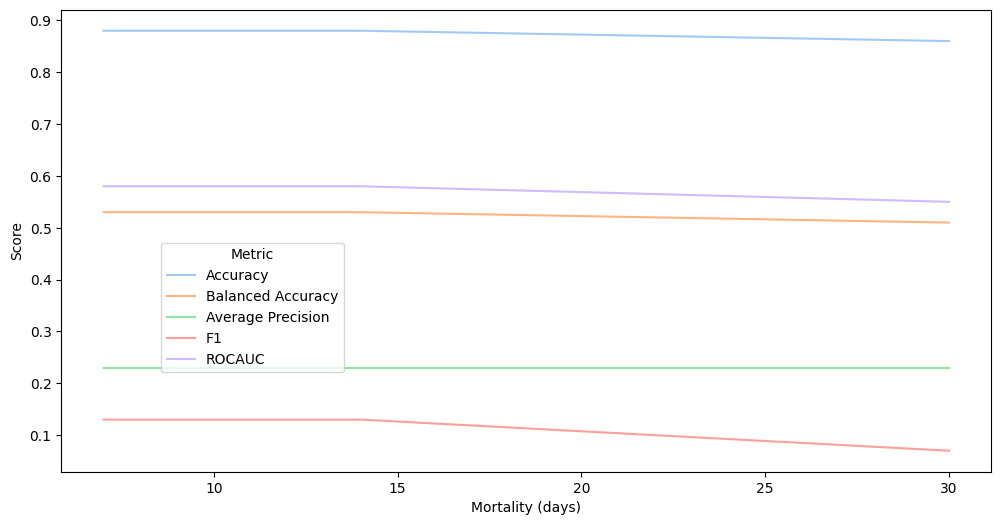

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lineplot(
    data=plotDf,
    x='Mortality',
    y='Score',
    hue='Metric',
    palette=sns.color_palette("pastel"),
    # height=6,
    # aspect=1.5,
    # lowess=True,
    # scatter_kws={"s": 0},
    )
ax.set(xlabel='Mortality (days)')
ax.set(ylabel='Score')
# ax.set_xticklabels(['', '50-50', '60-40', '70-30', '80-20', '90-10', ''])
sns.move_legend(ax, "lower left", bbox_to_anchor=(.1, .2))
plt.show()


## Modelling

### Run the analysis with: `WB=365 WA=3`

In [1]:
import os


casestudy1DirPath = '/home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1'

for mortalityDays in [7, 14, 30]:

    print('--------------------------------------------------------------------------------------------------------------------')
    print('losDays: ', mortalityDays)
    print('--------------------------------------------------------------------------------------------------------------------')

    os.system(
        'cd ' + os.environ['EHR_ML_BASE'] + ';'
        +
        '''.venv/bin/python -m ehrml.analysis.StandardisationAnalysis ''' + casestudy1DirPath + '''/data_matrix_mortality_final.csv -tc "death_''' + str(mortalityDays) + '''_day" -ic "person_id" -mdc "measurement_date" -adc "admittime" -wb 365 -wa 3 -sp ''' + casestudy1DirPath + '''/results/02.1/death_''' + str(mortalityDays) + '''_day;'''
        )


--------------------------------------------------------------------------------------------------------------------
losDays:  7
--------------------------------------------------------------------------------------------------------------------
2025-01-13 01:49:30,257 - EHR-ML - INFO - Parsing command line arguments
2025-01-13 01:49:30,258 - EHR-ML - INFO - args.data_file: /home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1/data_matrix_mortality_final.csv
2025-01-13 01:49:30,258 - EHR-ML - INFO - args.target_column: death_7_day
2025-01-13 01:49:30,258 - EHR-ML - INFO - args.id_columns: ['person_id']
2025-01-13 01:49:30,258 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2025-01-13 01:49:30,258 - EHR-ML - INFO - args.anchor_date_column: admittime
2025-01-13 01:49:30,258 - EHR-ML - INFO - args.window_before: 365
2025-01-13 01:49:30,258 - EHR-ML - INFO - args.window_after: 3
2025-01-13 01:49:30,258 - EHR-ML - INFO - args.ensemble: False
2025-01-13 01:49:30,258 - E

## Results

### Obtain the results

In [2]:
import json

import pandas as pd

from pathlib import Path

from statistics import mean
from statistics import stdev


casestudy1DirPath = '/home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1'

result_files = [
    'wb_365_wa_3_original.json',
    # 'wb_30_wa_30_standardised.json',
    # 'wb_30_wa_30_scaled.json',
]

data = []

for mortalityDays in [7, 14, 30]:

    resultsDirPath = casestudy1DirPath + '''/results/02.1/death_''' + str(mortalityDays) + '''_day'''

    for result_file in result_files:
        with open(Path(resultsDirPath, result_file)) as f:
            result = json.load(f)
            print()
            # print('Accuracy: ', round(mean(result['test_accuracy']), 2), '+-', round(stdev(result['test_accuracy']), 3))
            # print('Balanced Accuracy: ', round(mean(result['test_balanced_accuracy']), 2), '+-', round(stdev(result['test_balanced_accuracy']), 3))
            # print('Average Precision: ', round(mean(result['test_average_precision']), 2), '+-', round(stdev(result['test_average_precision']), 3))
            # print('F1: ', round(mean(result['test_f1']), 2), '+-', round(stdev(result['test_f1']), 3))
            # print('ROCAUC: ', round(mean(result['test_roc_auc']), 2), '+-', round(stdev(result['test_roc_auc']), 3))
            # data.append([losDays,
            #     result_file.split('/')[-1].split('.')[0].split('_')[4],
            #     round(mean(result['test_accuracy']), 2), round(stdev(result['test_accuracy']), 3),
            #     round(mean(result['test_balanced_accuracy']), 2), round(stdev(result['test_balanced_accuracy']), 3),
            #     round(mean(result['test_average_precision']), 2), round(stdev(result['test_average_precision']), 3),
            #     round(mean(result['test_f1']), 2), round(stdev(result['test_f1']), 3),
            #     round(mean(result['test_roc_auc']), 2), round(stdev(result['test_roc_auc']), 3),
            #     ])
            data.append(['Accuracy', mortalityDays, round(mean(result['test_accuracy']), 2)])
            data.append(['Balanced Accuracy', mortalityDays, round(mean(result['test_balanced_accuracy']), 2)])
            data.append(['Average Precision', mortalityDays, round(mean(result['test_average_precision']), 2)])
            data.append(['F1', mortalityDays, round(mean(result['test_f1']), 2)])
            data.append(['ROCAUC', mortalityDays, round(mean(result['test_roc_auc']), 2)])

plotDf = pd.DataFrame(data, columns=['Metric', 'Mortality', 'Score'])
plotDf

,Metric,Mortality,Score
0,Accuracy,7,0.89
1,Balanced Accuracy,7,0.52
2,Average Precision,7,0.31
3,F1,7,0.07
4,ROCAUC,7,0.73
5,Accuracy,14,0.89
6,Balanced Accuracy,14,0.52
7,Average Precision,14,0.31
8,F1,14,0.07
9,ROCAUC,14,0.73


### Plot

/tmp/ipykernel_1712615/555945711.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.lineplot(


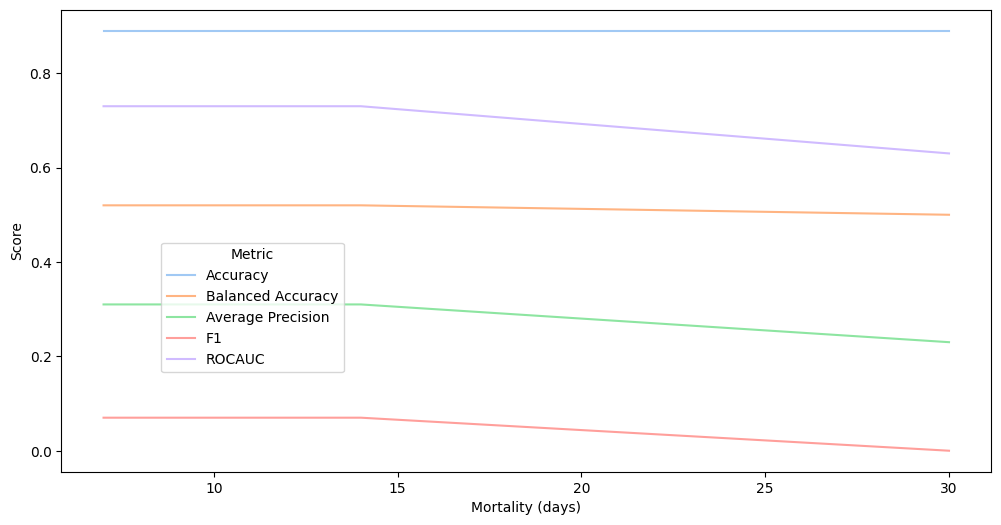

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lineplot(
    data=plotDf,
    x='Mortality',
    y='Score',
    hue='Metric',
    palette=sns.color_palette("pastel"),
    # height=6,
    # aspect=1.5,
    # lowess=True,
    # scatter_kws={"s": 0},
    )
ax.set(xlabel='Mortality (days)')
ax.set(ylabel='Score')
# ax.set_xticklabels(['', '50-50', '60-40', '70-30', '80-20', '90-10', ''])
sns.move_legend(ax, "lower left", bbox_to_anchor=(.1, .2))
plt.show()
